Огородников Николай Александрович, группа 191-321
# Задания. Часть 1.
Реализовать алгоритм градиентного спуска.

### Шаг 1. Подготовка искусственной выборки для проверки алгоритма.
Создать тензор формы (1000,), состоящий из равномерно распределенных случайных величин на отрезке `[min_value, max_value]`. $(\overline{x})$

In [89]:
import tensorflow as tf

min_value = -10
max_value = 10
x = tf.random.uniform((1000,), min_value, max_value, dtype=tf.float16)

Создать тензор формы (1000,), состоящий из нормально распределенных случайных величин с параметром отклонения равным $\sigma$. $(\overline{N})$

In [90]:
sigma = 5.45
N = tf.random.truncated_normal((1000,), 0.0, sigma, dtype=tf.float16)

Задать параметры для построения линейной регрессии $(k, b)$
Модель регрессии должна представлять следующий вид:
$$\overline{y}=\overline{x}*k+b+\overline{N}$$

In [91]:
k = 4
b = 6
y = x * k + b + N

Изобразить на графике зависимость $y$ от $x$, используя пакет `matplotlib.pyplot`

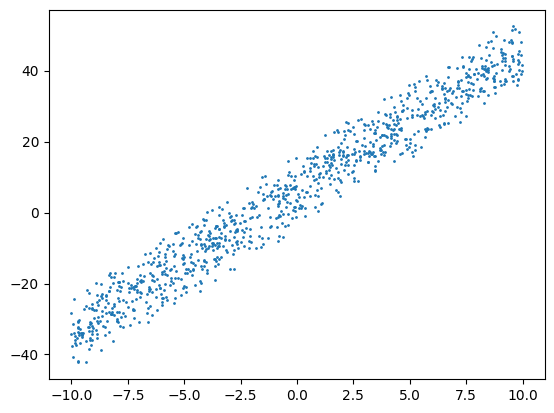

In [94]:
import matplotlib.pyplot as plt

plt.scatter(x, y, s=1)
plt.show()

### Шаг 2. Реализация алгоритма градиентного спуска.
Сам алгоритм выглядит следующим образом:
$$
\left\{
\begin{array}\\
\hat{k}_{n}=\hat{k}_{n-1}-\eta\frac{\delta loss}{\delta \hat{k}}\\
\hat{b}_{n}=\hat{b}_{n-1}-\eta\frac{\delta loss}{\delta \hat{b}}
\end{array}
\right.
$$
, где $loss=\frac{1}{N}\sum_{i=1}^{N}(y-\hat{y})^{2}$.
$\eta$ - шаг сходимости.
$loss$ - функция потерь, которую стараемся минимизировать.
$\hat{y}=\hat{k}x+\hat{b}$
Для реализации необходимо задать количество итераций, шаг сходимости. Необходимо использовать градиент из пакета `Tensorflow`.
Также для отображения результата, необходимо вывести получившиеся значения $\hat{k}, \hat{b}$ (должны быть близки к задаваемым) и получившуюся прямую $y=\hat{k}x+\hat{b}$.

k: 3.98242188
b: 6.13671875


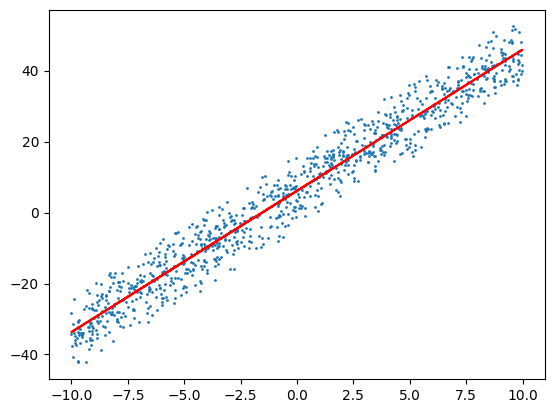

In [93]:
import sys

eta = 0.01
iterations = 500

k_predicted = tf.Variable(0.0, dtype=tf.float16)
b_predicted = tf.Variable(0.0, dtype=tf.float16)

for i in range(0, iterations):
    with tf.GradientTape() as tape:
        min_fun = k_predicted * x + b_predicted
        loss = tf.reduce_mean(tf.square(y - min_fun))

    delta_k, delta_b = tape.gradient(loss, [k_predicted, b_predicted])

    k_predicted.assign_sub(eta * delta_k)
    b_predicted.assign_sub(eta * delta_b)

y_predicted = k_predicted * x + b_predicted

tf.print("k:", k_predicted, output_stream=sys.stdout)
tf.print("b:", b_predicted, output_stream=sys.stdout)

plt.scatter(x, y, s=1)
plt.plot(x, y_predicted, c='r')
plt.show()

### Вывод

В рамках задания был разработан алгоритм градиентного спуска, изучены понятия тензора, градиента, нормального и градиентного распределения случайных величин.

В ходе решения была подготовлена искусственная выборка для проверки алгоритма, состоящая из тензоров с равномерным и с нормальным распределением случайных величин. Далее был реализован алгоритм градиентного спуска с помощью цикла градиента от функции потерь с заданными шагом сходимости и количеством итераций. Затем параметры корректируются в соответствии с формулой градиентного спуска. Конечным шагом полученный результат выводится в виде графика.

Методом подбора было выявлено, что для $\overline{x}$ на отрезке $-10$ до $10$, $\overline{N}$ с параметром $\sigma=5.45$,
параметров линейной регрессии $k=4$ и $b=6$, при шаге сходимости $\eta=0.01$ и $500$ итерациях алгоритма полученные предсказанные значения $\hat{k}, \hat{b}$ имели погрешность $0,15$.
